In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#metrics
from sklearn.metrics import mean_squared_error

#tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt,ExponentialSmoothing,SimpleExpSmoothing
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import month_plot

from sklearn.linear_model import LinearRegression

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [14]:
sparkling=pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')

In [15]:
sparkling.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [16]:
sparkling.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [29]:
sparkling.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


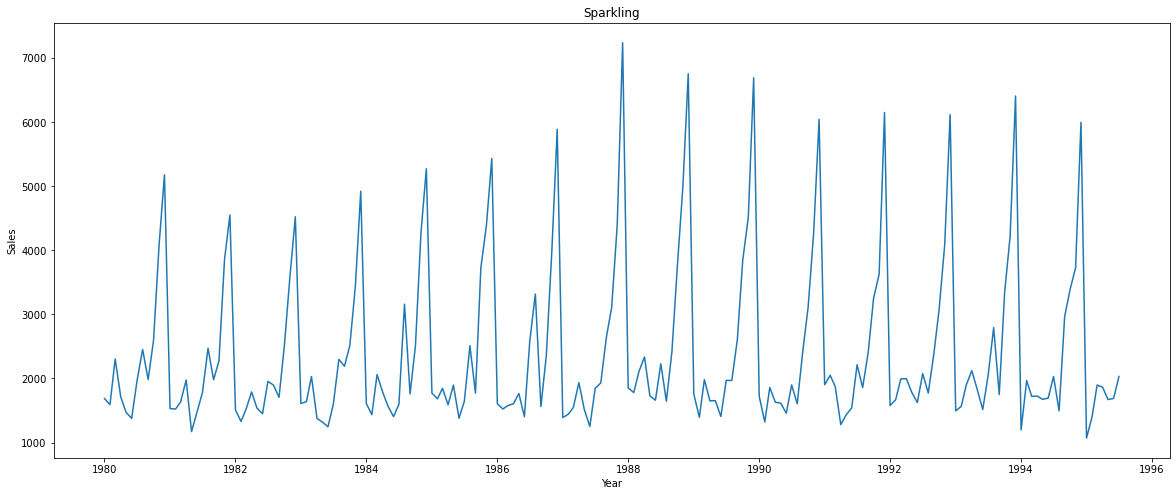

In [17]:

plt.plot(sparkling)

plt.title('Sparkling')
plt.xlabel('Year')
plt.ylabel('Sales');

D:\Softwares\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Monthly Box plot')

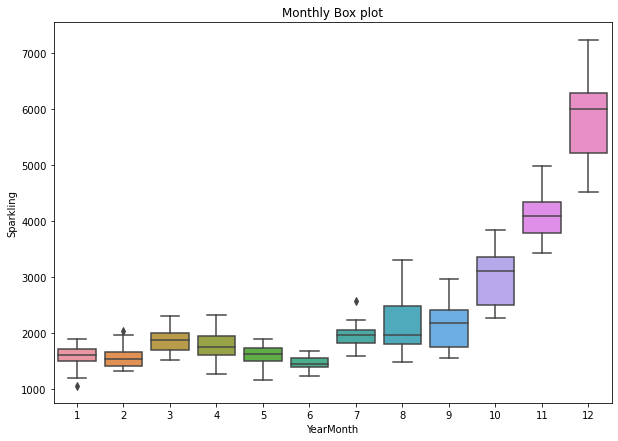

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(sparkling.index.month,sparkling.Sparkling)
plt.title('Monthly Box plot')

D:\Softwares\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Yearly Boxplot')

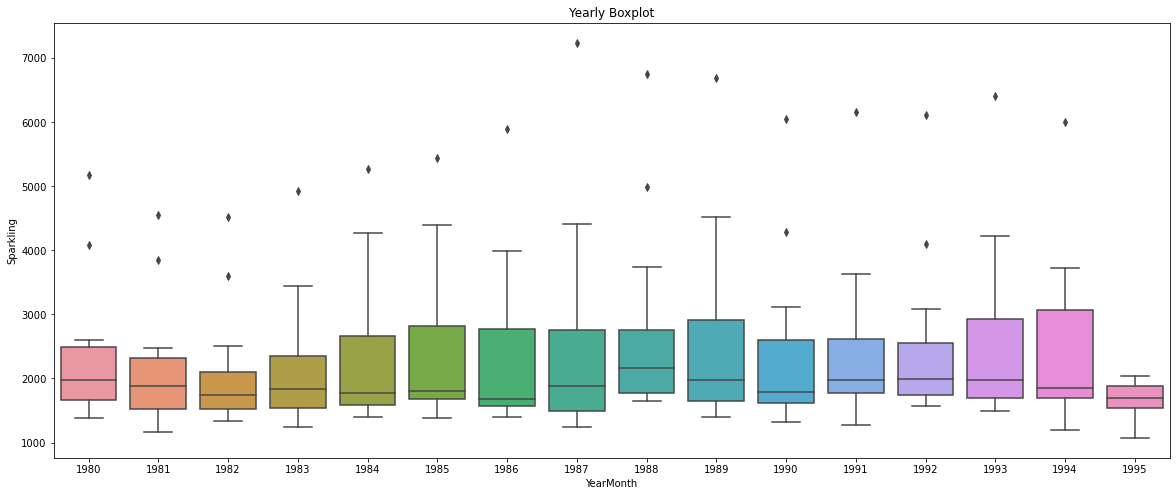

In [19]:
#plt.figure(figsize=(11,7))
sns.boxplot(sparkling.index.year,sparkling.Sparkling)
plt.title('Yearly Boxplot')

Text(0.5, 1.0, 'Monthly Distribution')

<Figure size 720x1080 with 0 Axes>

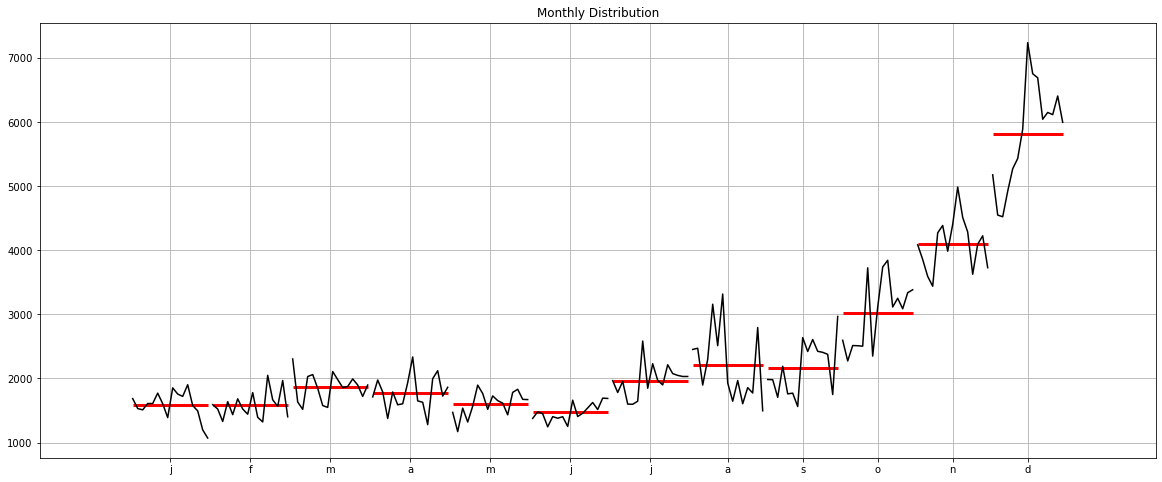

In [20]:
plt.figure(figsize=(10,15))
month_plot(sparkling.Sparkling)
plt.grid()
plt.title('Monthly Distribution')

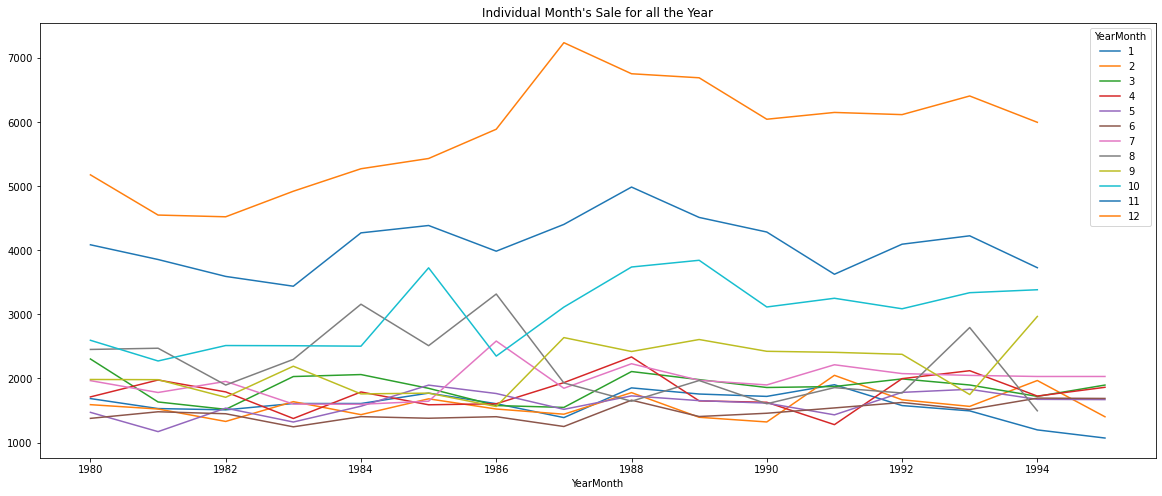

In [21]:
sales_across_month=pd.pivot_table(data=sparkling,index=sparkling.index.year,
                                  columns=sparkling.index.month,values='Sparkling')
sales_across_month.plot()
plt.title("Individual Month's Sale for all the Year");

Text(0.5, 1.0, 'Quarter sales')

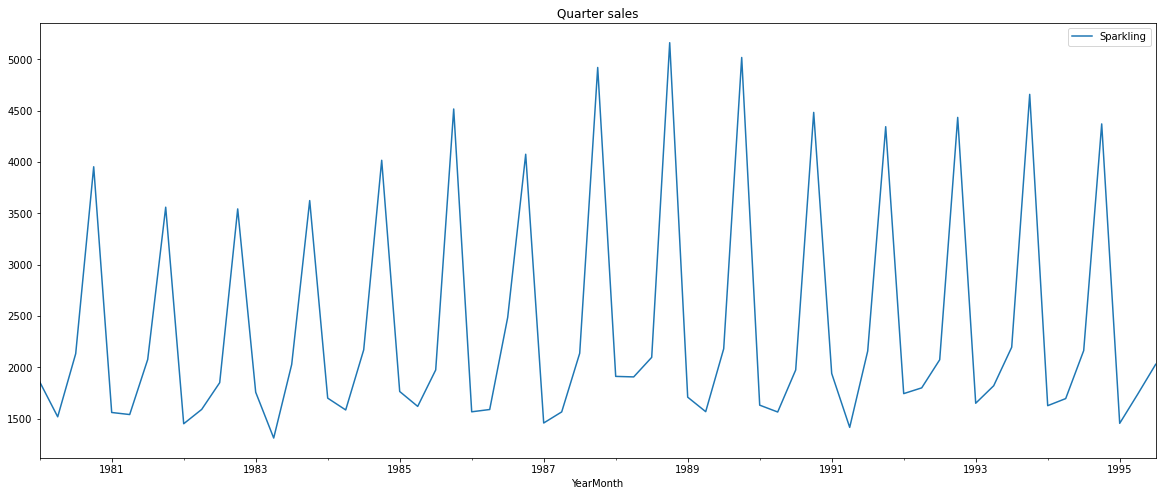

In [22]:
sparkling.resample('Q').mean().plot()
plt.title('Quarter sales')

Text(0.5, 1.0, 'Cumulative Sum')

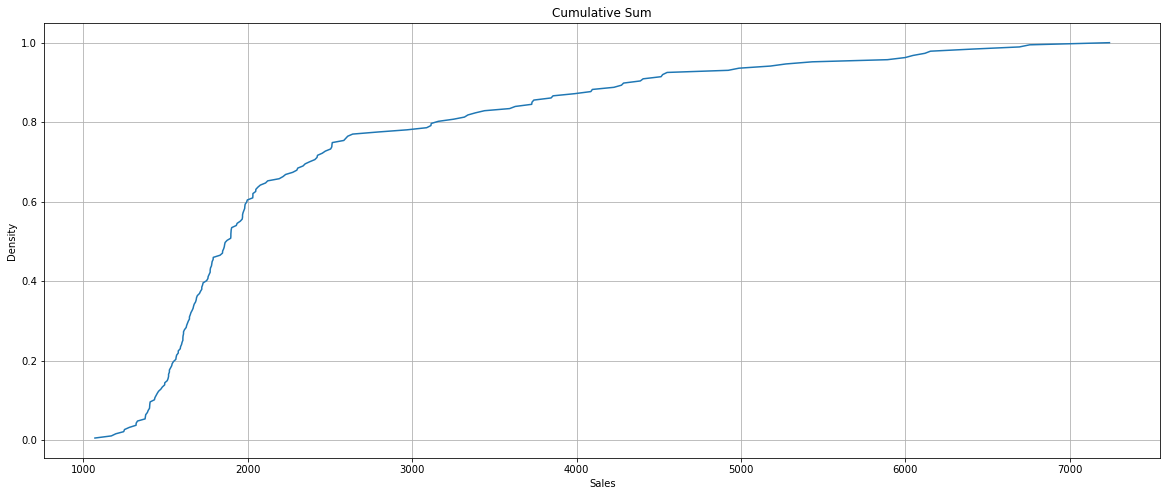

In [23]:
cdf=ECDF(sparkling.Sparkling)
plt.plot(cdf.x,cdf.y,label='Cumulative sum')
plt.grid()
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Cumulative Sum')

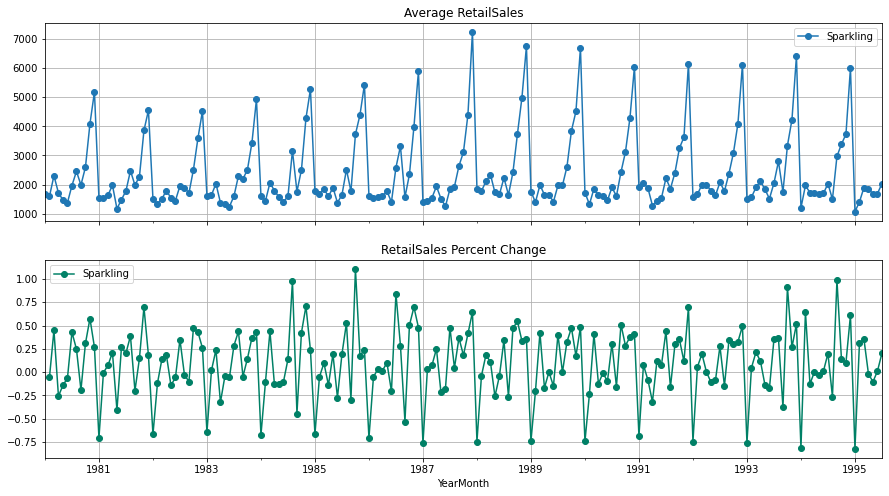

In [24]:
# group by date and get average RetailSales, and precent change
average    = sparkling.groupby(sparkling.index)["Sparkling"].mean()
pct_change = sparkling.groupby(sparkling.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

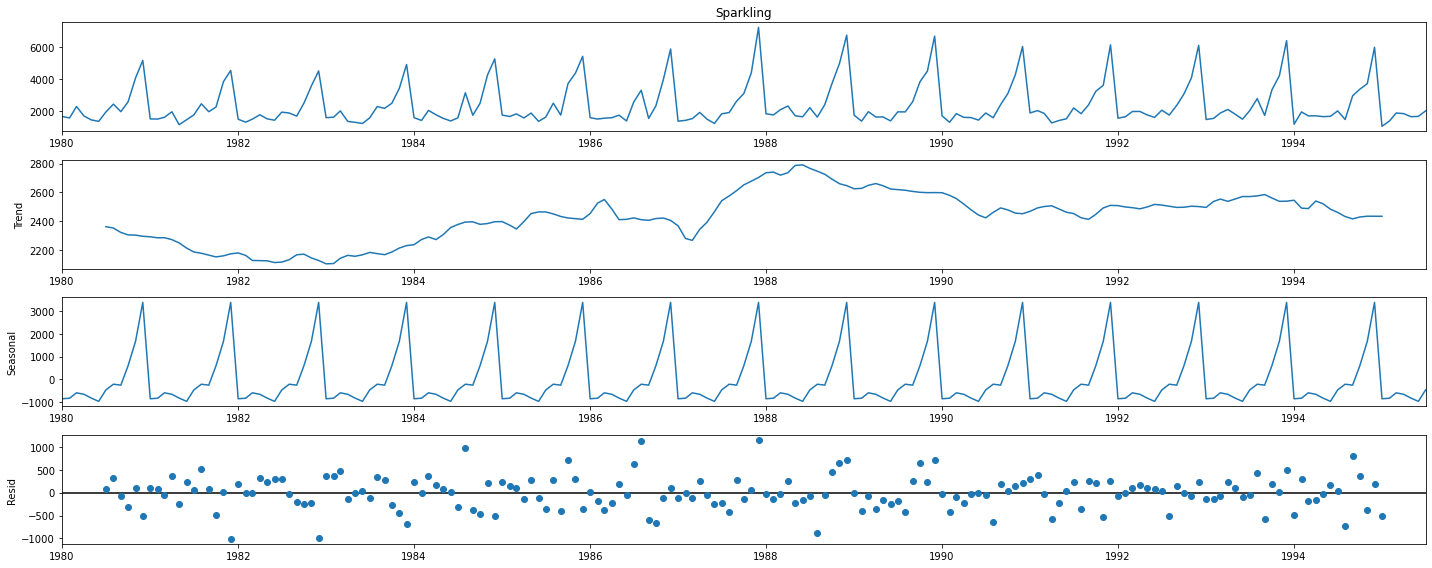

In [25]:
decompose=seasonal_decompose(sparkling['Sparkling'],model='additive')
decompose.plot();

Text(0.5, 1.0, 'Total Annual Sales')

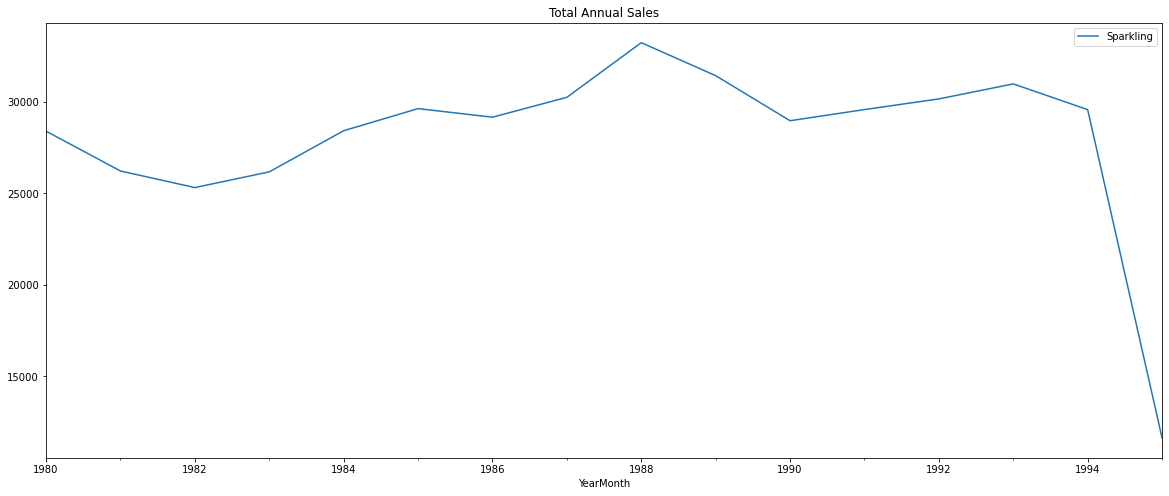

In [26]:
sparkling.resample('Y').sum().plot()
plt.title('Total Annual Sales')

Text(0.5, 1.0, 'Average Annual Sales')

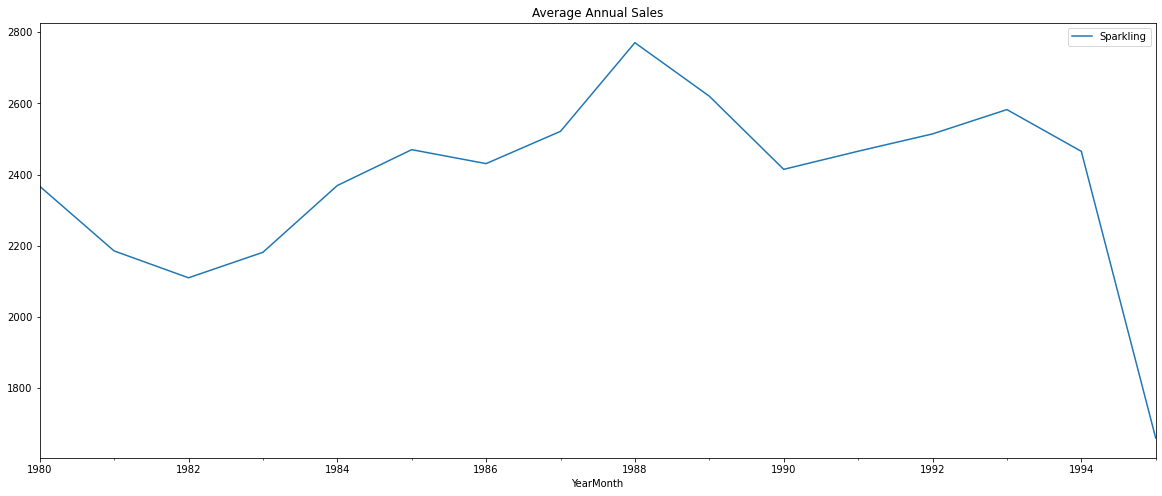

In [28]:
sparkling.resample('Y').mean().plot()
plt.title('Average Annual Sales')

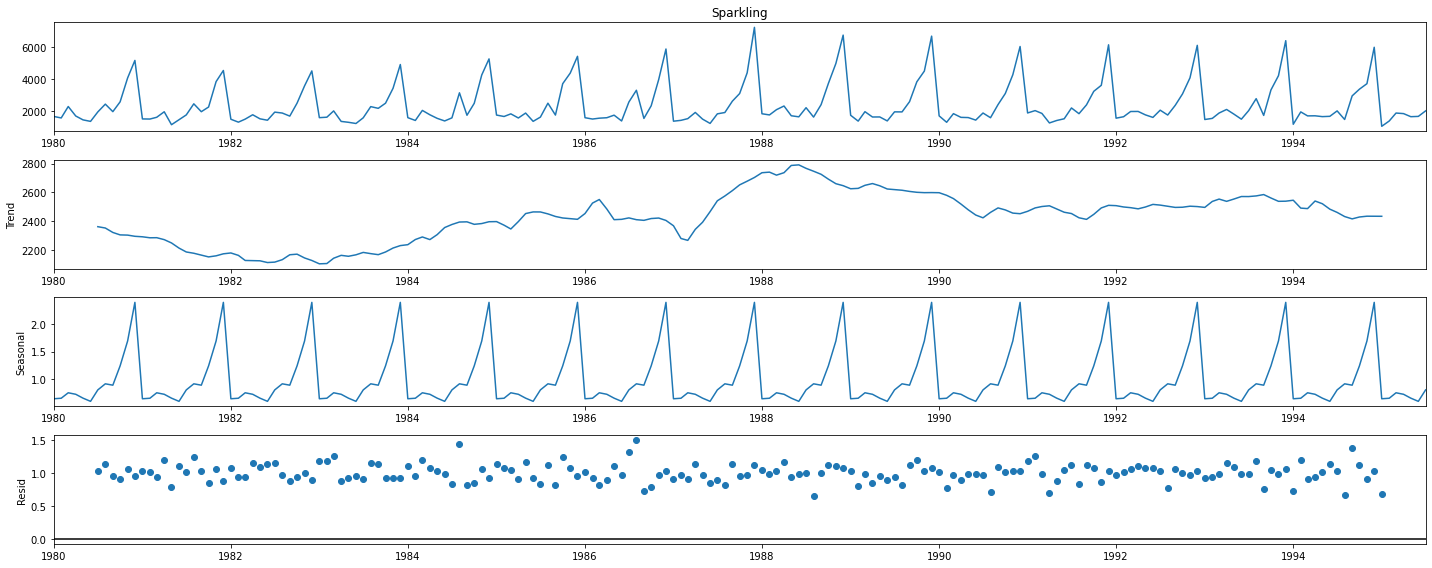

In [81]:
decompose=seasonal_decompose(sparkling['Sparkling'],model='multiplicative')
decompose.plot();

In [82]:
sparkling['months']=np.arange(0,sparkling.shape[0])
sparkling.head()

,Sparkling,months
YearMonth,,
1980-01-01,1686,0
1980-02-01,1591,1
1980-03-01,2304,2
1980-04-01,1712,3
1980-05-01,1471,4


In [83]:
train=sparkling[sparkling.index.year<1991]
test=sparkling[sparkling.index.year>=1991]

In [84]:
train.tail()

,Sparkling,months
YearMonth,,
1990-08-01,1605,127
1990-09-01,2424,128
1990-10-01,3116,129
1990-11-01,4286,130
1990-12-01,6047,131


In [85]:
test.tail()

,Sparkling,months
YearMonth,,
1995-03-01,1897,182
1995-04-01,1862,183
1995-05-01,1670,184
1995-06-01,1688,185
1995-07-01,2031,186


In [86]:
print('Size of the train data:',train.shape)
print('Size of the test data:',test.shape)

Size of the train data: (132, 2)
Size of the test data: (55, 2)


## Linear Regression

In [87]:
ln=LinearRegression()
ln.fit(y=train[['Sparkling']],X=train[['months']])

LinearRegression()

C:\Users\91759\AppData\Local\Temp/ipykernel_2768/1240793651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LinearReg']=ln.predict(test[['months']])


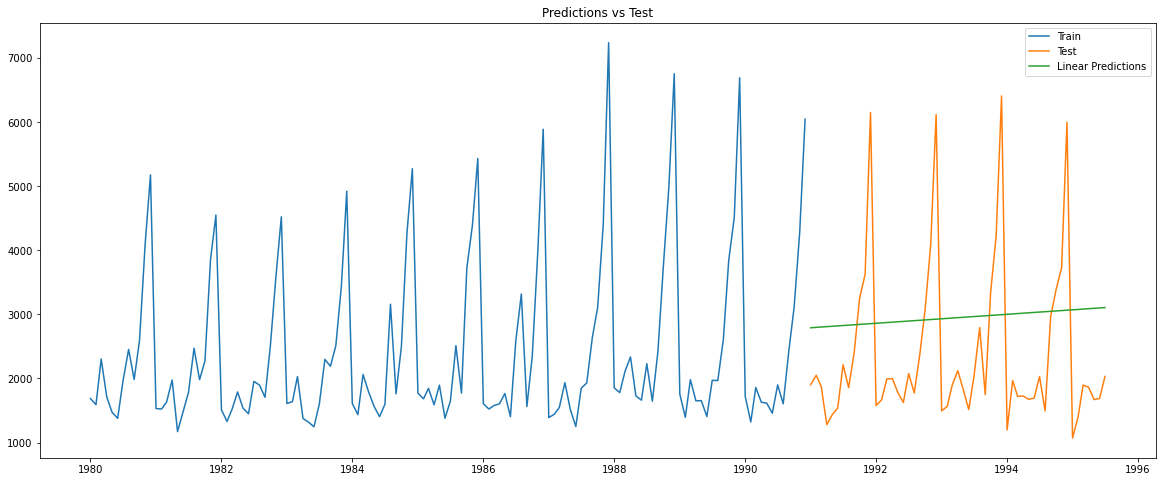

In [88]:
test['LinearReg']=ln.predict(test[['months']])


plt.plot(train.Sparkling,label='Train')
plt.plot(test.Sparkling,label='Test')
plt.plot(test.LinearReg,label='Linear Predictions')
plt.legend()
plt.title('Predictions vs Test');

In [89]:
ln_rmse=mean_squared_error(test.Sparkling,test.LinearReg,squared=False)
print(ln_rmse)

1389.135174897992


In [90]:
results=pd.DataFrame({'RMSE':ln_rmse},index=['Linear_Regression'])
results

,RMSE
Linear_Regression,1389.135175


In [91]:
ln.coef_

array([[5.8326585]])

## Naive Bayers model

In [92]:
naive=train.tail(1).Sparkling.values[0]
naive

6047

In [93]:
test['Naive']=naive


C:\Users\91759\AppData\Local\Temp/ipykernel_2768/2221364657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Naive']=naive


Text(0.5, 1.0, 'Predictions vs Test')

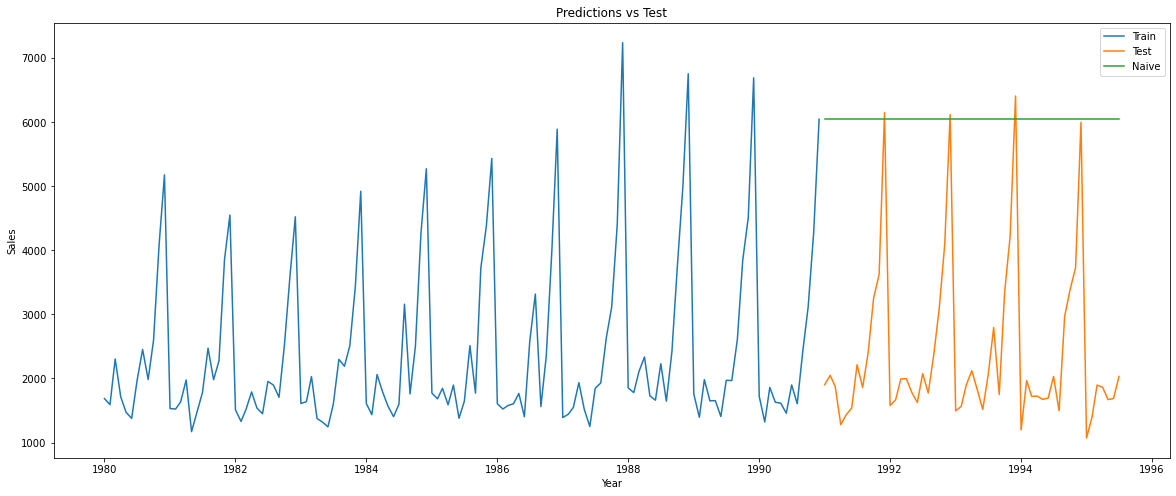

In [94]:
plt.plot(train.Sparkling,label='Train')
plt.plot(test.Sparkling,label='Test')
plt.plot(test.Naive,label='Naive')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Predictions vs Test')

In [95]:
test

,Sparkling,months,LinearReg,Naive
YearMonth,,,,
1991-01-01,1902,132,2791.652093,6047
1991-02-01,2049,133,2797.484752,6047
1991-03-01,1874,134,2803.317410,6047
1991-04-01,1279,135,2809.150069,6047
1991-05-01,1432,136,2814.982727,6047
1991-06-01,1540,137,2820.815386,6047
1991-07-01,2214,138,2826.648044,6047
1991-08-01,1857,139,2832.480703,6047
1991-09-01,2408,140,2838.313361,6047


In [96]:
naive_rmse=mean_squared_error(test.Sparkling,test.Naive,squared=False)
print(naive_rmse)

3864.2793518443914


In [97]:
results=pd.concat([results,pd.DataFrame({'RMSE':naive_rmse},index=['Naive'])])
results

,RMSE
Linear_Regression,1389.135175
Naive,3864.279352


## Simple Average

In [98]:
test['Simple_Avg']=train['Sparkling'].mean()
test.head()

C:\Users\91759\AppData\Local\Temp/ipykernel_2768/1641260672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Simple_Avg']=train['Sparkling'].mean()


,Sparkling,months,LinearReg,Naive,Simple_Avg
YearMonth,,,,,
1991-01-01,1902,132,2791.652093,6047,2403.780303
1991-02-01,2049,133,2797.484752,6047,2403.780303
1991-03-01,1874,134,2803.317410,6047,2403.780303
1991-04-01,1279,135,2809.150069,6047,2403.780303
1991-05-01,1432,136,2814.982727,6047,2403.780303


Text(0.5, 1.0, 'Predictions vs Test')

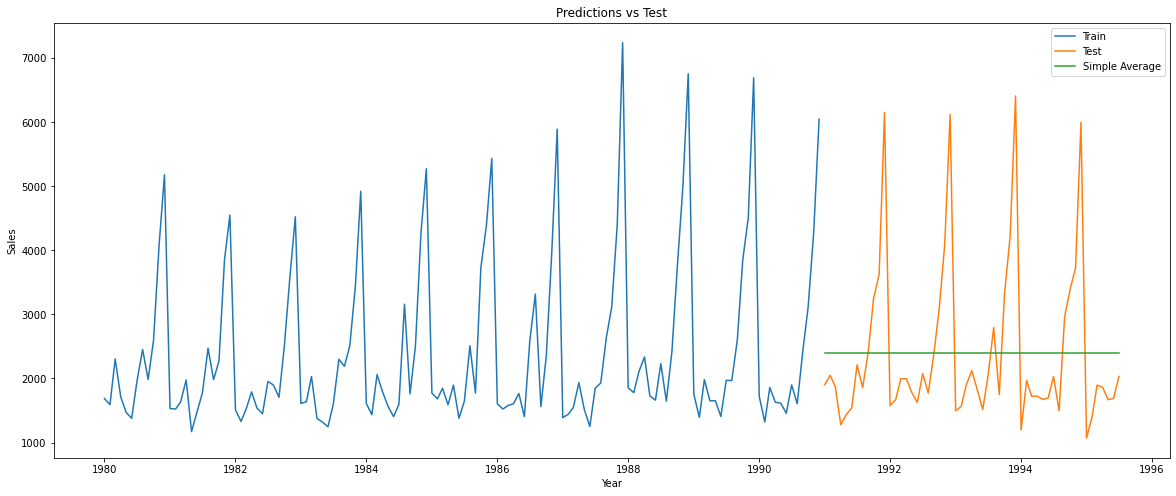

In [99]:
plt.plot(train.Sparkling,label='Train')
plt.plot(test.Sparkling,label='Test')
plt.plot(test.Simple_Avg,label='Simple Average')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Predictions vs Test')

In [100]:
Simple_avg_rmse=mean_squared_error(test.Sparkling,test.Simple_Avg,squared=False)
print(Simple_avg_rmse)

1275.0818036965309


In [101]:
results=pd.concat([results,pd.DataFrame({'RMSE':Simple_avg_rmse},index=['Simple_Avg'])])
results

,RMSE
Linear_Regression,1389.135175
Naive,3864.279352
Simple_Avg,1275.081804


## Moving Average

In [102]:
MovingAverage=sparkling.copy()

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Sparkling'].rolling(3).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_5'] = MovingAverage['Sparkling'].rolling(5).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_7'] = MovingAverage['Sparkling'].rolling(7).mean()
MovingAverage.head()

,Sparkling,months,Trailing_2,Trailing_3,Trailing_4,Trailing_5,Trailing_6,Trailing_7
YearMonth,,,,,,,,
1980-01-01,1686,0,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-01,1591,1,1638.5,NaN,NaN,NaN,NaN,NaN
1980-03-01,2304,2,1947.5,1860.333333,NaN,NaN,NaN,NaN
1980-04-01,1712,3,2008.0,1869.000000,1823.25,NaN,NaN,NaN
1980-05-01,1471,4,1591.5,1829.000000,1769.50,1752.8,NaN,NaN


In [103]:
trailing_MovingAverage_train=MovingAverage[0:int(len(train))] 
trailing_MovingAverage_test=MovingAverage[int(len(train)):]

In [104]:
trailing_MovingAverage_test.shape

(55, 8)

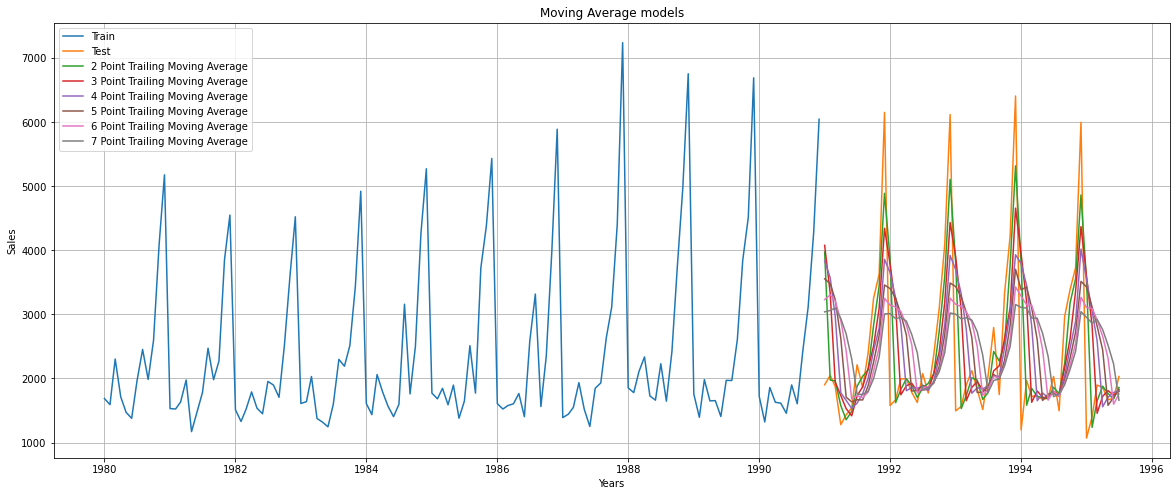

In [105]:


plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label = '4 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_5'],label = '5 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average')
plt.plot(trailing_MovingAverage_test['Trailing_7'],label = '7 Point Trailing Moving Average')

plt.legend(loc = 'best')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Moving Average models')
plt.grid();

In [106]:
rmse_list=[mean_squared_error(test['Sparkling'],trailing_MovingAverage_test[x],squared=False) for x in MovingAverage.columns[2:]]
for i,x in enumerate(MovingAverage.columns[2:]):
    print("For {} point Moving Average Model forecast on the Training Data,  RMSE is {}".format(i+2,rmse_list[i]) )
    
    results=pd.concat([results,pd.DataFrame({'RMSE':rmse_list[i]},index=[x])])


For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.4006839972983
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 1028.6057563615916
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.589694081071
For 5 point Moving Average Model forecast on the Training Data,  RMSE is 1234.0453440910214
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.9274280129855
For 7 point Moving Average Model forecast on the Training Data,  RMSE is 1331.1633419842478


In [107]:
results

,RMSE
Linear_Regression,1389.135175
Naive,3864.279352
Simple_Avg,1275.081804
Trailing_2,813.400684
Trailing_3,1028.605756
Trailing_4,1156.589694
Trailing_5,1234.045344
Trailing_6,1283.927428
Trailing_7,1331.163342


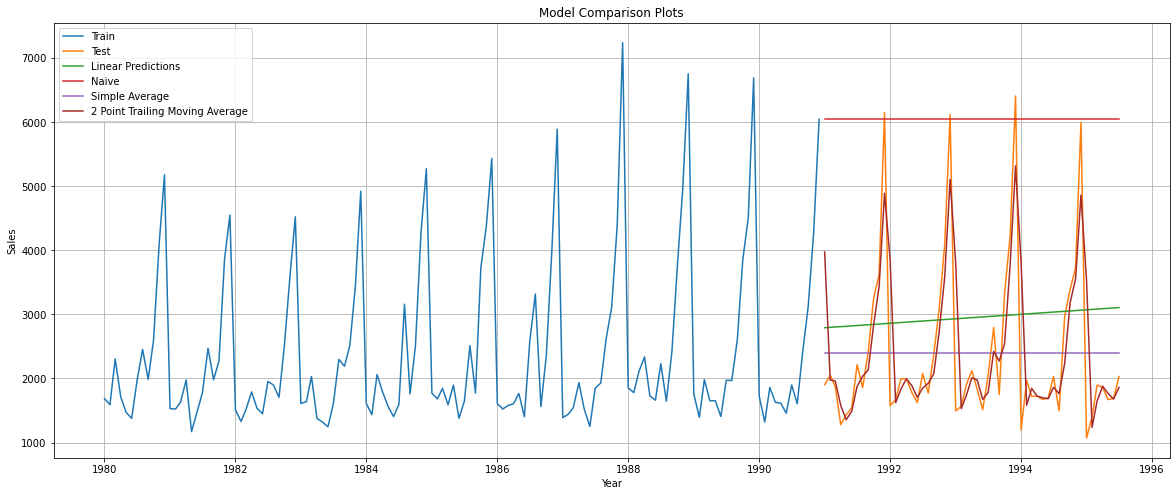

In [108]:

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test.LinearReg,label='Linear Predictions')

plt.plot(test.Naive,label='Naive')

plt.plot(test.Simple_Avg,label='Simple Average')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average',color='brown')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

## Exponential Smoothing Methods

In [109]:

sparkling.drop(columns=['months'],inplace=True)


In [110]:
train=sparkling[sparkling.index.year<1991]
test=sparkling[sparkling.index.year>=1991]

## Simple Exponential smoothing

In [111]:
#Simple Exponential smoothing
model_SES=SimpleExpSmoothing(train,initialization_method='estimated').fit(optimized=True)
model_SES.params

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [112]:
SES_predict=model_SES.forecast(steps=len(test))
SES_predict.head()

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Apha= 0.07')

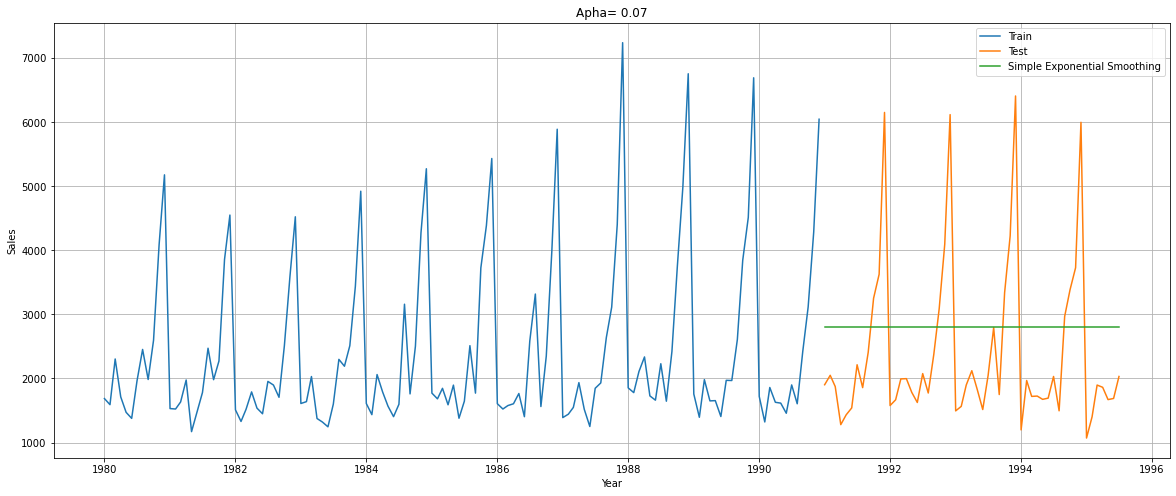

In [113]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(SES_predict,label='Simple Exponential Smoothing')
plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Apha= 0.07')

In [114]:
print('RMSE for Simple Exponential Smoothing model is :',mean_squared_error(SES_predict,test,squared=False))

RMSE for Simple Exponential Smoothing model is : 1338.0083844916467


In [115]:
results=pd.concat([results,pd.DataFrame({'RMSE':mean_squared_error(SES_predict,test,squared=False)},index=['Simple_Exponential_Smoothing'])])

In [116]:
results

,RMSE
Linear_Regression,1389.135175
Naive,3864.279352
Simple_Avg,1275.081804
Trailing_2,813.400684
Trailing_3,1028.605756
Trailing_4,1156.589694
Trailing_5,1234.045344
Trailing_6,1283.927428
Trailing_7,1331.163342
Simple_Exponential_Smoothing,1338.008384


## Double Exponential smoothing(Hotl's Method)

In [117]:
model_DES=Holt(train,initialization_method='estimated').fit(optimized=True)
model_DES.params

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999991,
 'initial_trend': 74.87272727272739,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [118]:
DES_predict=model_DES.forecast(len(test))
DES_predict.head()

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
Freq: MS, dtype: float64

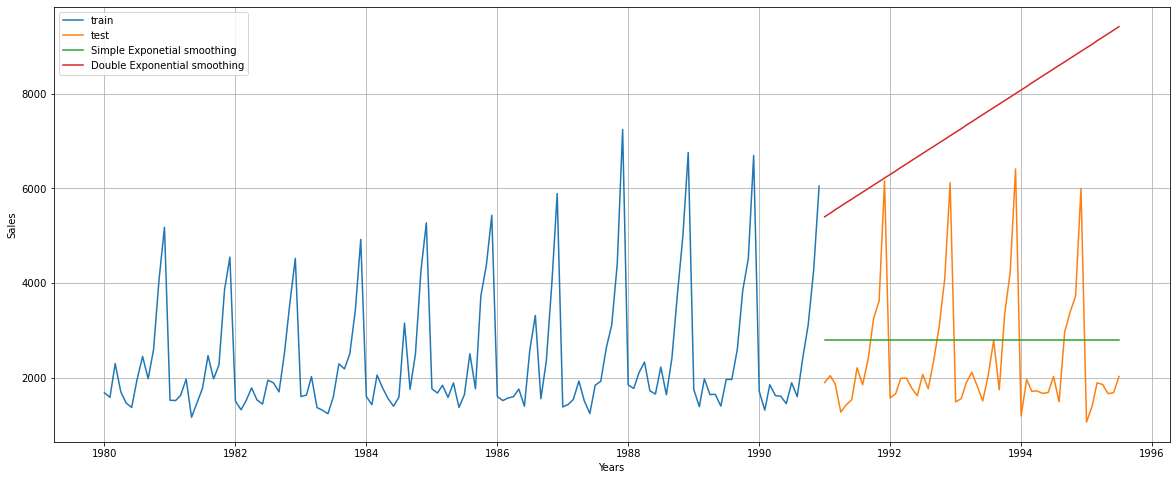

In [119]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='Simple Exponetial smoothing')
plt.plot(DES_predict,label='Double Exponential smoothing')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.legend()
plt.grid()

In [120]:
print('RMSE for Double Exponential Smoothing model is :',mean_squared_error(DES_predict,test,squared=False))
results=pd.concat([results,pd.DataFrame({'RMSE':mean_squared_error(DES_predict,test,squared=False)},
                                        index=['Double_Exponential_Smoothing'])])

RMSE for Double Exponential Smoothing model is : 5291.8798332269125


In [121]:
results

,RMSE
Linear_Regression,1389.135175
Naive,3864.279352
Simple_Avg,1275.081804
Trailing_2,813.400684
Trailing_3,1028.605756
Trailing_4,1156.589694
Trailing_5,1234.045344
Trailing_6,1283.927428
Trailing_7,1331.163342
Simple_Exponential_Smoothing,1338.008384


## Holt Winter's Method

In [122]:
model_TES=ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated').fit(optimized=True)
model_TES.params

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.11127227248079453,
 'smoothing_trend': 0.012360804305088534,
 'smoothing_seasonal': 0.46071766688111543,
 'damping_trend': nan,
 'initial_level': 2356.577980956387,
 'initial_trend': -0.10243675533021725,
 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
        -808.42473284, -815.34991402, -384.23065038,   72.99484403,
        -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [123]:
TES_predict=model_TES.forecast(len(test))
TES_predict.head()

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1490.402890
1991-02-01    1204.525152
1991-03-01    1688.734182
1991-04-01    1551.226125
1991-05-01    1461.197883
Freq: MS, dtype: float64

Text(0.5, 0, 'Year')

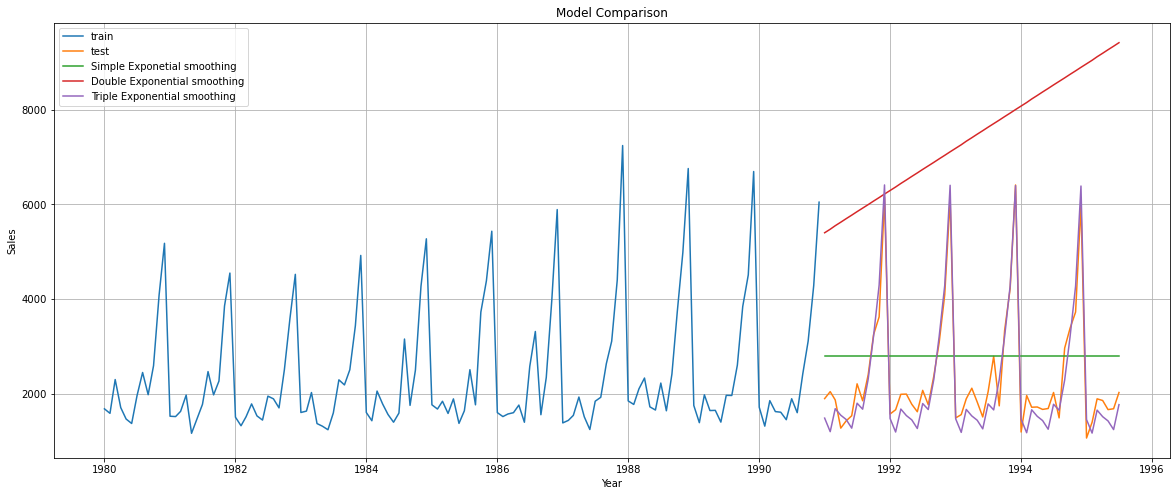

In [124]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='Simple Exponetial smoothing')
plt.plot(DES_predict,label='Double Exponential smoothing')
plt.plot(TES_predict,label='Triple Exponential smoothing')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.title("Model Comparison")
plt.xlabel('Year')

In [125]:
print('RMSE for Holt winter Smoothing model is :',mean_squared_error(TES_predict,test,squared=False))
results=pd.concat([results,pd.DataFrame({'RMSE':mean_squared_error(TES_predict,test,squared=False)},
                                        index=['Holt_winter'])])

RMSE for Holt winter Smoothing model is : 378.95102286703


In [126]:
results

,RMSE
Linear_Regression,1389.135175
Naive,3864.279352
Simple_Avg,1275.081804
Trailing_2,813.400684
Trailing_3,1028.605756
Trailing_4,1156.589694
Trailing_5,1234.045344
Trailing_6,1283.927428
Trailing_7,1331.163342
Simple_Exponential_Smoothing,1338.008384


## Check for stationarity of the data

In [127]:
from statsmodels.tsa.stattools import adfuller

In [128]:
dftest=adfuller(sparkling,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932753
Number of lags used 12


In [129]:
dftest=adfuller(sparkling.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


Text(0, 0.5, 'Differences')

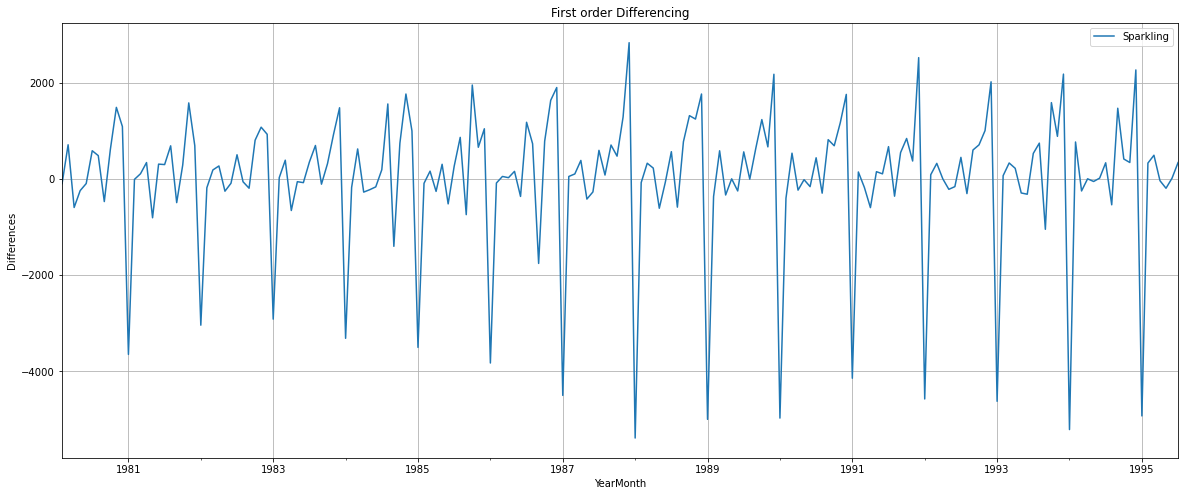

In [130]:
sparkling.diff().dropna().plot(grid=True)
plt.title('First order Differencing')
plt.ylabel('Differences')

<AxesSubplot:xlabel='YearMonth'>

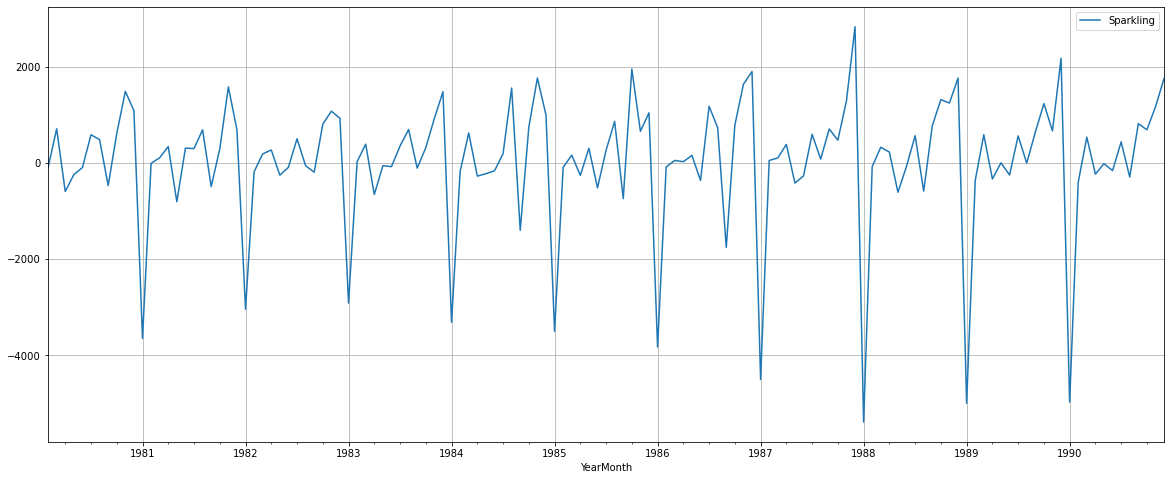

In [131]:
train.diff().dropna().plot(grid=True)


In [132]:
dftest=adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514366e-11
Number of lags used 11


## Building an automated version of SARIMA model

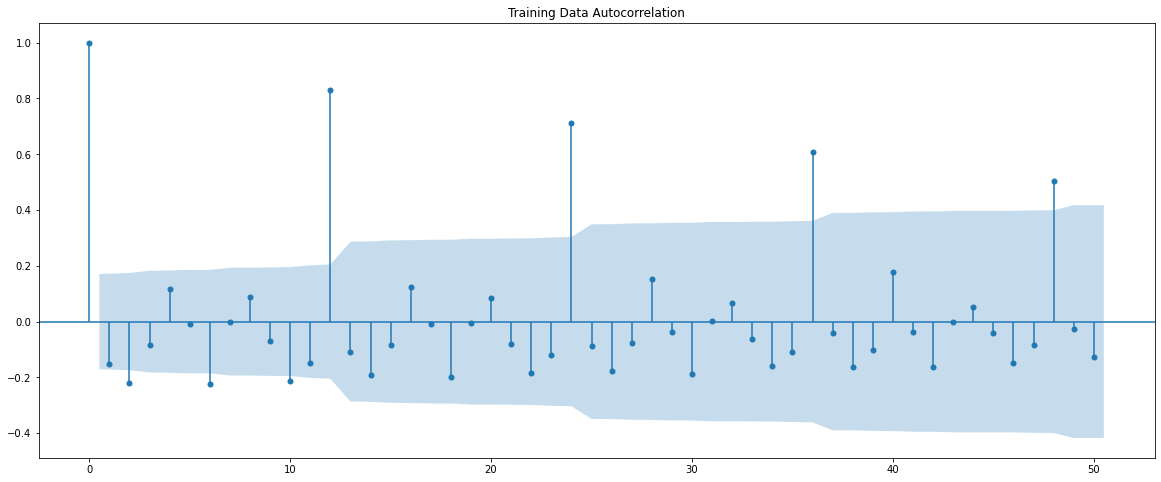

In [133]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=50);

In [134]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [67]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)

pdq=list(itertools.product(p, d, q))
PDQ = list(itertools.product(p, D, q,[12]))


from statsmodels.tsa.statespace import sarimax
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
   
    for param_seasonal in PDQ:
        
        SARIMA_model=sarimax.SARIMAX(train,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results_SARIMA_12 = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{} --  Rmse:{},'.format(param, param_seasonal, results_SARIMA_12.aic,mean_squared_error(results_SARIMA_12.forecast(steps=len(test)),test,squared=False)))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_12.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2447.5387828489993 --  Rmse:2716.93044378461,
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2094.7855992116274 --  Rmse:2496.2965430043805,
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1815.8304642934677 --  Rmse:2303.411528042919,
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1786.4850411919438 --  Rmse:339.5231950839294,
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1596.2586002542678 --  Rmse:327.1099372819189,
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:1428.1357423138452 --  Rmse:328.36127751947913,
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1802.3841958898233 --  Rmse:349.2885590190543,
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1765.9902957951824 --  Rmse:451.5311017704558,
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:1602.6508528654333 --  Rmse:454.8455758976305,
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1615.0445907515473 --  Rmse:333.14324516203635,
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1598.2582087358621 --  Rmse:326.90360465337216,
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:1429.736216741166 --  Rmse:327.60749901231884,
S

SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:1601.7587293000872 --  Rmse:533.6743700817547,
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:1556.155971744277 --  Rmse:375.70235563638687,
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.3988672022454 --  Rmse:321.0471819148228,
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774397775 --  Rmse:441.4685647380366,
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438855184834 --  Rmse:576.1025561095317,
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215842895365 --  Rmse:526.5392787931337,
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1427.0773415442964 --  Rmse:333.1510735382424,
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1428.5534767511854 --  Rmse:330.8106389170058,
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:1386.023734263968 --  Rmse:327.52426201395855,
SARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:2263.0761053927263 --  Rmse:2477.593089777957,
SARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1965.4582057559503 --  Rmse:2319.1111874654666,
SARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:1729.3684996720876 --  Rmse:2157.865723285079,
SAR

SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.463345050375 --  Rmse:1316.5899773359658,
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307500739 --  Rmse:1217.3735633545357,
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421598016 --  Rmse:1093.8129417265345,
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1742.736627544211 --  Rmse:558.5737504027824,
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1554.9584139011115 --  Rmse:445.26227329251867,
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.3477800330927 --  Rmse:382.5767344640364,
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799349605 --  Rmse:323.57858804408454,
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.99521831177 --  Rmse:583.5355488913535,
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842471384522 --  Rmse:528.5924497908835,
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:1585.7860900921323 --  Rmse:588.3466061010781,
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.1300441715875 --  Rmse:436.1148405736496,
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1384.1378738609365 --  Rmse:401.51603276155913,
SA

SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1574.372406725528 --  Rmse:606.6155871041046,
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1571.8577388008093 --  Rmse:443.87103976011025,
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:1401.9104199707283 --  Rmse:387.35810112837163,
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506089788 --  Rmse:744.1724209944031,
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595853781935 --  Rmse:652.5679278336617,
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428631884208 --  Rmse:630.8017064059002,
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.985406982294 --  Rmse:367.1018596477786,
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.9924735500217 --  Rmse:359.94580934411476,
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1403.8183455626206 --  Rmse:353.1187486700408,
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681147684483 --  Rmse:1293.4691713496068,
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372631948035 --  Rmse:1207.698883460473,
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.552343262955 --  Rmse:1093.118496616411,
SARI

In [68]:
SARIMA_AIC.sort_values(by='AIC')

,param,seasonal,AIC
203,"(1, 1, 2)","(0, 1, 2, 12)",1382.347780
95,"(0, 1, 2)","(0, 1, 2, 12)",1382.484254
209,"(1, 1, 2)","(1, 1, 2, 12)",1384.137874
311,"(2, 1, 2)","(0, 1, 2, 12)",1384.317618
101,"(0, 1, 2)","(1, 1, 2, 12)",1384.398867
...,...,...,...
54,"(0, 1, 0)","(0, 0, 0, 12)",2251.359720
108,"(1, 0, 0)","(0, 0, 0, 12)",2263.076105
36,"(0, 0, 2)","(0, 0, 0, 12)",2278.506917
18,"(0, 0, 1)","(0, 0, 0, 12)",2337.107016


In [138]:
sarima_models=pd.DataFrame()

In [135]:

import statsmodels.api as sm

param=(1,1,2)
seasonal_param=(0,1,2, 12)
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=param,
                                seasonal_order=seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sat, 18 Dec 2021   AIC                           1382.348
Time:                                    21:56:10   BIC                           1397.479
Sample:                                01-01-1980   HQIC                          1388.455
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

In [136]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [166]:
print('RMSE for Auto Sarima model is :',mean_squared_error(predicted_auto_SARIMA_12.predicted_mean,test,squared=False))
rmse=mean_squared_error(predicted_auto_SARIMA_12.predicted_mean,test,squared=False)

#sarima_models=pd.DataFrame({'RMSE':[rmse]},index=['SARIMAX(0, 0, 4)x(0, 1, 4, 12)'])
sarima_models=pd.concat([sarima_models,pd.DataFrame({'RMSE':[rmse],'AIC':results_auto_SARIMA_12.aic},index=['SARIMAX{}X{}'.format(param,seasonal_param)])])
results=pd.concat([results,pd.DataFrame({'RMSE':mean_squared_error(predicted_auto_SARIMA_12.predicted_mean,test,squared=False)},
                                        index=['Auto_SARIMA(1,1,2)(0,1,2,12)'])])

RMSE for Auto Sarima model is : 382.5767344640364


In [140]:
sarima_models

,RMSE,AIC
"SARIMAX(1, 1, 2)X(0, 1, 2, 12)",382.576734,1382.34778


In [167]:
results

,RMSE
Linear_Regression,1389.135175
Naive,3864.279352
Simple_Avg,1275.081804
Trailing_2,813.400684
Trailing_3,1028.605756
Trailing_4,1156.589694
Trailing_5,1234.045344
Trailing_6,1283.927428
Trailing_7,1331.163342
Simple_Exponential_Smoothing,1338.008384


Text(0.5, 1.0, 'Auto Sarima model Predictions')

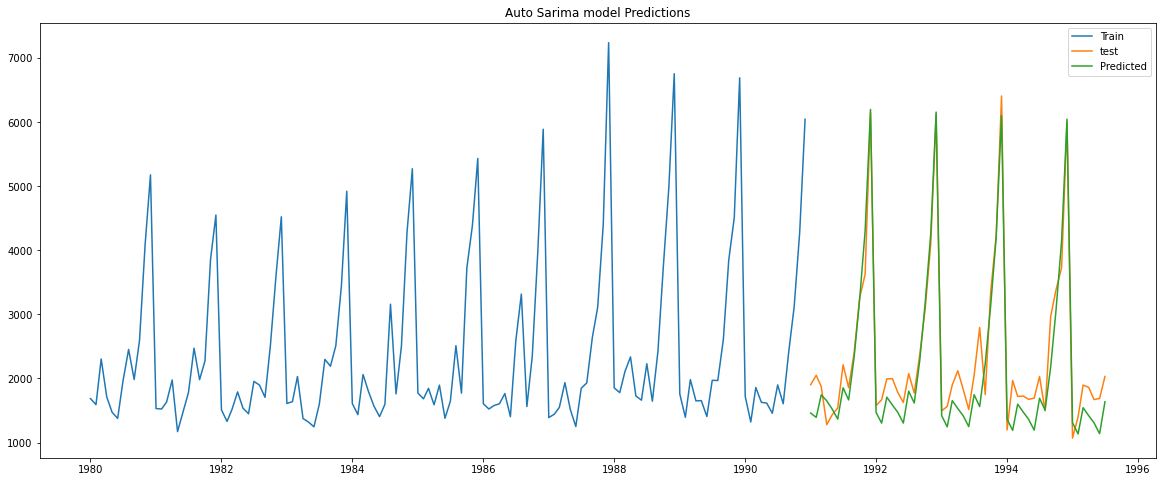

In [141]:

plt.plot(train,label='Train')
plt.plot(test,label='test')
plt.plot(predicted_auto_SARIMA_12.predicted_mean,label='Predicted')
plt.legend()
plt.title('Auto Sarima model Predictions')

### Trying model with seasonality 6

In [173]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)

pdq=list(itertools.product(p, d, q))
PDQ = list(itertools.product(p, D, q,[6]))

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

from statsmodels.tsa.statespace import sarimax
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model=sarimax.SARIMAX(train,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results_SARIMA_6 = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_6.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_6.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:2447.5387828489993
SARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:2316.256197115848
SARIMA(0, 0, 0)x(0, 0, 2, 6) - AIC:2084.3553624892993
SARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:2280.5252252009495
SARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:2037.2896365978706
SARIMA(0, 0, 0)x(0, 1, 2, 6) - AIC:1856.0024695682719
SARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:2281.4566301751534
SARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:2151.915234009729
SARIMA(0, 0, 0)x(1, 0, 2, 6) - AIC:1965.4168487879717
SARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:1802.0949415896628
SARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:1789.94156607714
SARIMA(0, 0, 0)x(1, 1, 2, 6) - AIC:1681.2662130836236
SARIMA(0, 0, 0)x(2, 0, 0, 6) - AIC:1804.0548045292603
SARIMA(0, 0, 0)x(2, 0, 1, 6) - AIC:1805.8994990342628
SARIMA(0, 0, 0)x(2, 0, 2, 6) - AIC:1769.0961403012604
SARIMA(0, 0, 0)x(2, 1, 0, 6) - AIC:1716.669931393362
SARIMA(0, 0, 0)x(2, 1, 1, 6) - AIC:1718.6406413296943
SARIMA(0, 0, 0)x(2, 1, 2, 6) - AIC:1686.0432131560328
SARIMA(0, 0, 1)x(0, 0, 0, 6) - AI

SARIMA(1, 0, 2)x(1, 1, 0, 6) - AIC:1783.635202621503
SARIMA(1, 0, 2)x(1, 1, 1, 6) - AIC:1754.9073332768319
SARIMA(1, 0, 2)x(1, 1, 2, 6) - AIC:1654.3605857968987
SARIMA(1, 0, 2)x(2, 0, 0, 6) - AIC:1784.6615995399186
SARIMA(1, 0, 2)x(2, 0, 1, 6) - AIC:1793.1030353742212
SARIMA(1, 0, 2)x(2, 0, 2, 6) - AIC:1739.1592809455615
SARIMA(1, 0, 2)x(2, 1, 0, 6) - AIC:1697.3425528195269
SARIMA(1, 0, 2)x(2, 1, 1, 6) - AIC:1699.3374341298763
SARIMA(1, 0, 2)x(2, 1, 2, 6) - AIC:1655.9709664014592
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:2151.078268308422
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1953.3652245477156
SARIMA(1, 1, 0)x(0, 1, 0, 6) - AIC:2263.080729551281
SARIMA(1, 1, 0)x(0, 1, 1, 6) - AIC:2018.2022955294979
SARIMA(1, 1, 0)x(0, 1, 2, 6) - AIC:1854.7450090970249
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:2146.1836648562185
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:2073.981368525434
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1917.5889468332687
SARIMA(1, 1, 0)x(1, 1, 0, 6) - A

SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.8681147684483
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.7782222388523
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.7875404630274
SARIMA(2, 1, 2)x(0, 1, 0, 6) - AIC:2165.2336560919316
SARIMA(2, 1, 2)x(0, 1, 1, 6) - AIC:1932.5262857957562
SARIMA(2, 1, 2)x(0, 1, 2, 6) - AIC:1789.955587447962
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.1102217625075
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.605896996941
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1825.8956954615257
SARIMA(2, 1, 2)x(1, 1, 0, 6) - AIC:1758.537353720856
SARIMA(2, 1, 2)x(1, 1, 1, 6) - AIC:1745.906346788733
SARIMA(2, 1, 2)x(1, 1, 2, 6) - AIC:1644.2713770185374
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.272840917471
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.8267435833768
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1782.3426569473315
SARIMA(2, 1, 2)x(2, 1, 0, 6) - AIC:1673.608555041596
SARIMA(2, 1, 2)x(2, 1, 1, 6) - AIC:1673.295125412826
SARIMA(2, 1, 2)x(2, 1, 2, 6) - AIC:1643.8963109934064


In [174]:
SARIMA_AIC.sort_values(by='AIC').head(15)

,param,seasonal,AIC
101,"(0, 1, 2)","(1, 1, 2, 6)",1640.930651
215,"(1, 1, 2)","(2, 1, 2, 6)",1641.896939
107,"(0, 1, 2)","(2, 1, 2, 6)",1642.390747
323,"(2, 1, 2)","(2, 1, 2, 6)",1643.896311
317,"(2, 1, 2)","(1, 1, 2, 6)",1644.271377
47,"(0, 0, 2)","(1, 1, 2, 6)",1653.350732
263,"(2, 0, 2)","(1, 1, 2, 6)",1654.267558
155,"(1, 0, 2)","(1, 1, 2, 6)",1654.360586
53,"(0, 0, 2)","(2, 1, 2, 6)",1655.067255
191,"(1, 1, 1)","(1, 1, 2, 6)",1655.583786


In [73]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0, 1, 2),
                                seasonal_order=(1, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 6)   Log Likelihood                -814.465
Date:                           Fri, 17 Dec 2021   AIC                           1640.931
Time:                                   17:36:55   BIC                           1657.134
Sample:                               01-01-1980   HQIC                          1647.503
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7631      0.107     -7.153      0.000      -0.972      -0.554
ma.L2         -0.1423      0.113     -1.260

D:\Softwares\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


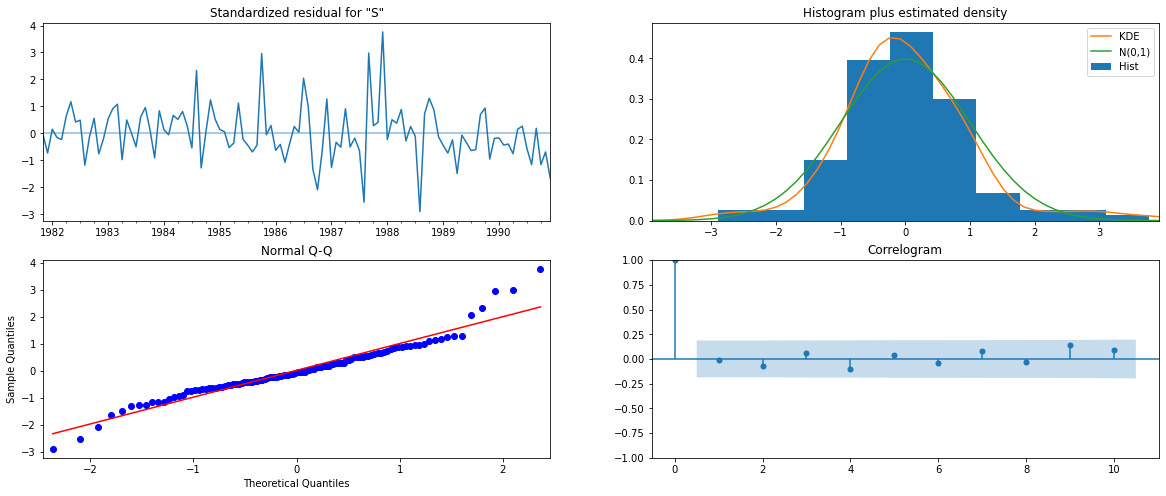

In [74]:
results_auto_SARIMA_6.plot_diagnostics();

In [75]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [76]:
print('RMSE for Auto Sarima model is :',mean_squared_error(predicted_auto_SARIMA_6.predicted_mean,test,squared=False))
rmse=mean_squared_error(predicted_auto_SARIMA_6.predicted_mean,test,squared=False)

sarima_models=pd.concat([sarima_models,pd.DataFrame({'RMSE':[rmse],'AIC':results_auto_SARIMA_6.aic},index=['SARIMAX(2, 1, 3)x(1, 2, 3, 6)'])])
sarima_models

RMSE for Auto Sarima model is : 558.3180861012087


,RMSE,AIC
"SARIMAX(1, 1, 2)X(0, 1, 2, 12)",382.576734,1382.347780
"SARIMAX(2, 1, 3)x(1, 2, 3, 6)",558.318086,1640.930651


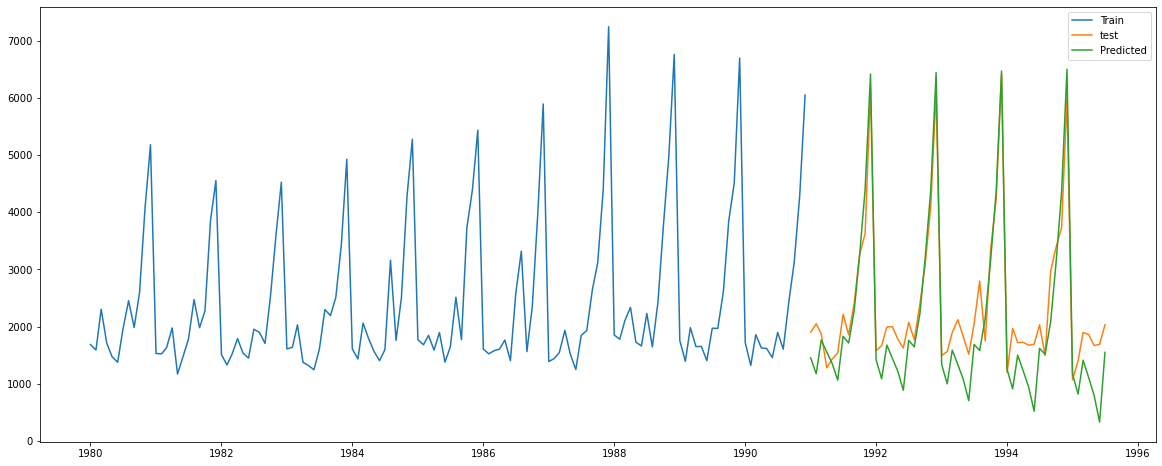

In [179]:

plt.plot(train,label='Train')
plt.plot(test,label='test')
plt.plot(predicted_auto_SARIMA_6.predicted_mean,label='Predicted')
plt.legend()

### Trying with seasonality with 24

In [180]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)

pdq=list(itertools.product(p, d, q))
PDQ = list(itertools.product(p, D, q,[24]))

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model=sarimax.SARIMAX(train,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)



SARIMA(0, 0, 0)x(0, 0, 0, 24) - AIC:2447.5387828489993
SARIMA(0, 0, 0)x(0, 0, 1, 24) - AIC:1894.8724408052972
SARIMA(0, 0, 0)x(0, 0, 2, 24) - AIC:1422.5811338325193
SARIMA(0, 0, 0)x(0, 1, 0, 24) - AIC:1642.1781168328073
SARIMA(0, 0, 0)x(0, 1, 1, 24) - AIC:1279.9594519750972
SARIMA(0, 0, 0)x(0, 1, 2, 24) - AIC:915.7500134059105
SARIMA(0, 0, 0)x(1, 0, 0, 24) - AIC:1657.9090367967883
SARIMA(0, 0, 0)x(1, 0, 1, 24) - AIC:1626.4208276467036
SARIMA(0, 0, 0)x(1, 0, 2, 24) - AIC:1270.4177827998203
SARIMA(0, 0, 0)x(1, 1, 0, 24) - AIC:1292.4962673881573
SARIMA(0, 0, 0)x(1, 1, 1, 24) - AIC:1276.6418185485031
SARIMA(0, 0, 0)x(1, 1, 2, 24) - AIC:912.5852260117338
SARIMA(0, 0, 0)x(2, 0, 0, 24) - AIC:1282.133713687681
SARIMA(0, 0, 0)x(2, 0, 1, 24) - AIC:1284.626694721553
SARIMA(0, 0, 0)x(2, 0, 2, 24) - AIC:1269.8393507109597
SARIMA(0, 0, 0)x(2, 1, 0, 24) - AIC:930.4652557483878
SARIMA(0, 0, 0)x(2, 1, 1, 24) - AIC:931.9628046045707
SARIMA(0, 0, 0)x(2, 1, 2, 24) - AIC:912.5008148166776
SARIMA(0, 0, 1)x(

SARIMA(1, 0, 2)x(1, 0, 1, 24) - AIC:1593.6432860239493
SARIMA(1, 0, 2)x(1, 0, 2, 24) - AIC:1243.2417092814912
SARIMA(1, 0, 2)x(1, 1, 0, 24) - AIC:1279.3686646021688
SARIMA(1, 0, 2)x(1, 1, 1, 24) - AIC:1251.350472470253
SARIMA(1, 0, 2)x(1, 1, 2, 24) - AIC:886.4092343256056
SARIMA(1, 0, 2)x(2, 0, 0, 24) - AIC:1273.952239751784
SARIMA(1, 0, 2)x(2, 0, 1, 24) - AIC:1271.7857885640633
SARIMA(1, 0, 2)x(2, 0, 2, 24) - AIC:1245.159279829611
SARIMA(1, 0, 2)x(2, 1, 0, 24) - AIC:916.8851045970855
SARIMA(1, 0, 2)x(2, 1, 1, 24) - AIC:918.1494856965664
SARIMA(1, 0, 2)x(2, 1, 2, 24) - AIC:888.3330940371676
SARIMA(1, 1, 0)x(0, 0, 0, 24) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 24) - AIC:1761.4002015462606
SARIMA(1, 1, 0)x(0, 0, 2, 24) - AIC:1351.5524833141635
SARIMA(1, 1, 0)x(0, 1, 0, 24) - AIC:1658.625569683336
SARIMA(1, 1, 0)x(0, 1, 1, 24) - AIC:1286.2788605928883
SARIMA(1, 1, 0)x(0, 1, 2, 24) - AIC:916.4861983195235
SARIMA(1, 1, 0)x(1, 0, 0, 24) - AIC:1660.4379204917227
SARIMA(1, 1, 0)x(1,

SARIMA(2, 1, 1)x(2, 0, 2, 24) - AIC:1237.9533918362654
SARIMA(2, 1, 1)x(2, 1, 0, 24) - AIC:889.0789844061626
SARIMA(2, 1, 1)x(2, 1, 1, 24) - AIC:889.1141728105148
SARIMA(2, 1, 1)x(2, 1, 2, 24) - AIC:889.9292049971203
SARIMA(2, 1, 2)x(0, 0, 0, 24) - AIC:2176.8681147684483
SARIMA(2, 1, 2)x(0, 0, 1, 24) - AIC:1707.1259156987833
SARIMA(2, 1, 2)x(0, 0, 2, 24) - AIC:1311.164630552979
SARIMA(2, 1, 2)x(0, 1, 0, 24) - AIC:1598.2941988245677
SARIMA(2, 1, 2)x(0, 1, 1, 24) - AIC:1235.7371823852045
SARIMA(2, 1, 2)x(0, 1, 2, 24) - AIC:872.8568420219414
SARIMA(2, 1, 2)x(1, 0, 0, 24) - AIC:1615.2956647958695
SARIMA(2, 1, 2)x(1, 0, 1, 24) - AIC:1575.201015158622
SARIMA(2, 1, 2)x(1, 0, 2, 24) - AIC:1267.9504159510925
SARIMA(2, 1, 2)x(1, 1, 0, 24) - AIC:1250.3180496810633
SARIMA(2, 1, 2)x(1, 1, 1, 24) - AIC:1231.4247620106635
SARIMA(2, 1, 2)x(1, 1, 2, 24) - AIC:874.3325990927219
SARIMA(2, 1, 2)x(2, 0, 0, 24) - AIC:1244.5196214488806
SARIMA(2, 1, 2)x(2, 0, 1, 24) - AIC:1242.4005255625887
SARIMA(2, 1, 2)x(

In [181]:
SARIMA_AIC.sort_values(by='AIC').head(15)

,param,seasonal,AIC
203,"(1, 1, 2)","(0, 1, 2, 24)",870.869858
95,"(0, 1, 2)","(0, 1, 2, 24)",871.808266
209,"(1, 1, 2)","(1, 1, 2, 24)",872.346972
101,"(0, 1, 2)","(1, 1, 2, 24)",872.831783
311,"(2, 1, 2)","(0, 1, 2, 24)",872.856842
215,"(1, 1, 2)","(2, 1, 2, 24)",873.566997
107,"(0, 1, 2)","(2, 1, 2, 24)",873.641747
317,"(2, 1, 2)","(1, 1, 2, 24)",874.332599
323,"(2, 1, 2)","(2, 1, 2, 24)",875.551634
47,"(0, 0, 2)","(1, 1, 2, 24)",884.575019


In [77]:
auto_SARIMA_24 = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_24 = auto_SARIMA_24.fit(maxiter=1000)
print(results_auto_SARIMA_24.summary())



D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 24)   Log Likelihood                -429.435
Date:                            Fri, 17 Dec 2021   AIC                            870.870
Time:                                    17:37:17   BIC                            883.022
Sample:                                01-01-1980   HQIC                           875.581
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5924      0.208     -2.849      0.004      -1.000      -0.185
ma.L1         -0.0863      0.195   

In [78]:
predicted_auto_SARIMA_24 = results_auto_SARIMA_24.get_forecast(steps=len(test))
print('RMSE for Auto Sarima model is :',mean_squared_error(predicted_auto_SARIMA_24.predicted_mean,test,squared=False))
rmse=mean_squared_error(predicted_auto_SARIMA_24.predicted_mean,test,squared=False)
sarima_models=pd.concat([sarima_models,pd.DataFrame({'RMSE':[rmse],'AIC':results_auto_SARIMA_24.aic},index=['SARIMAX(1, 1, 2)x(0, 1, 2, 24)'])])
sarima_models

RMSE for Auto Sarima model is : 320.54956531142835


,RMSE,AIC
"SARIMAX(1, 1, 2)X(0, 1, 2, 12)",382.576734,1382.347780
"SARIMAX(2, 1, 3)x(1, 2, 3, 6)",558.318086,1640.930651
"SARIMAX(1, 1, 2)x(0, 1, 2, 24)",320.549565,870.869858


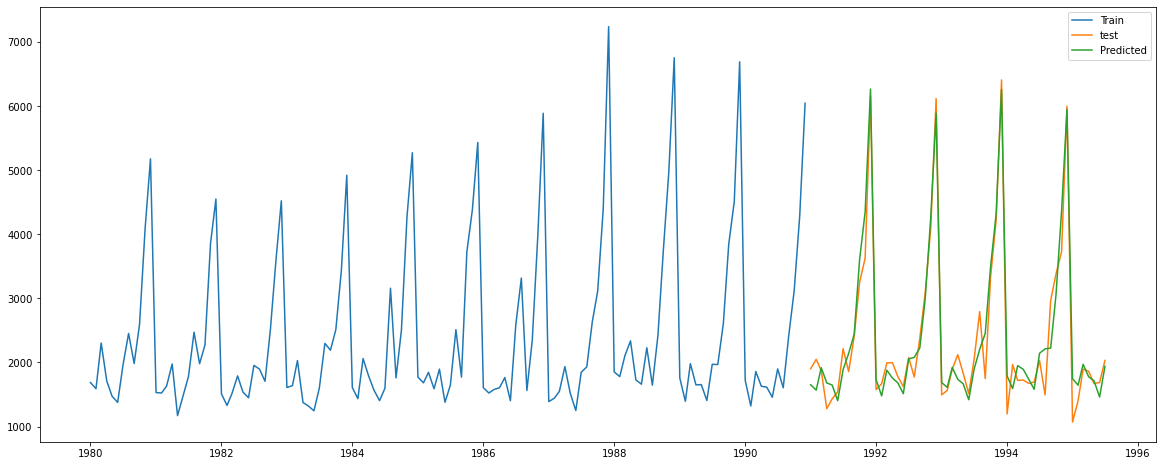

In [184]:

plt.plot(train,label='Train')
plt.plot(test,label='test')
plt.plot(predicted_auto_SARIMA_24.predicted_mean,label='Predicted')
plt.legend()

## Manual building of Sarima model

<AxesSubplot:xlabel='YearMonth'>

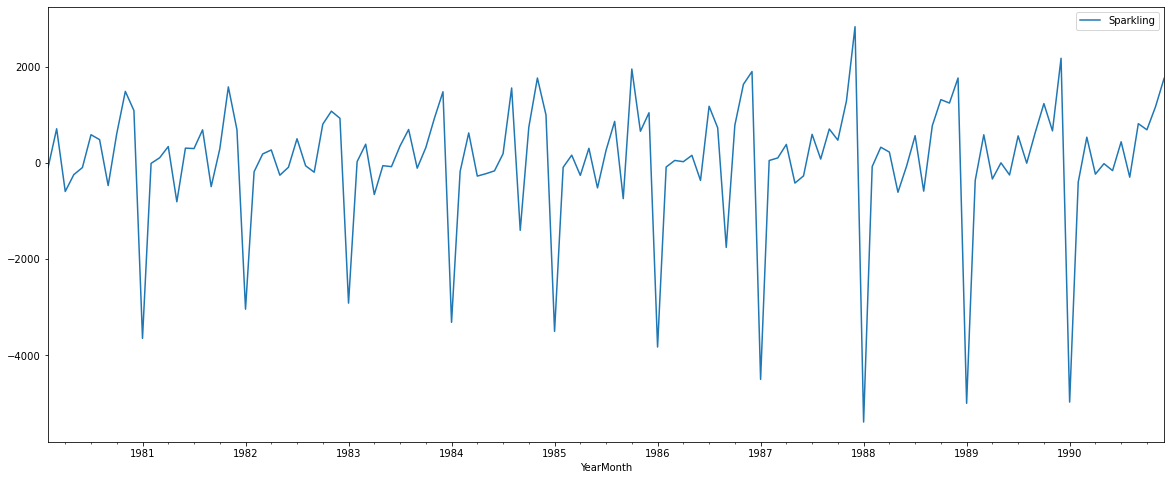

In [142]:
train.diff(1).dropna().plot()

In [143]:
dftest=adfuller(train.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514366e-11
Number of lags used 11


Text(0.5, 1.0, 'Seasonal Differencing')

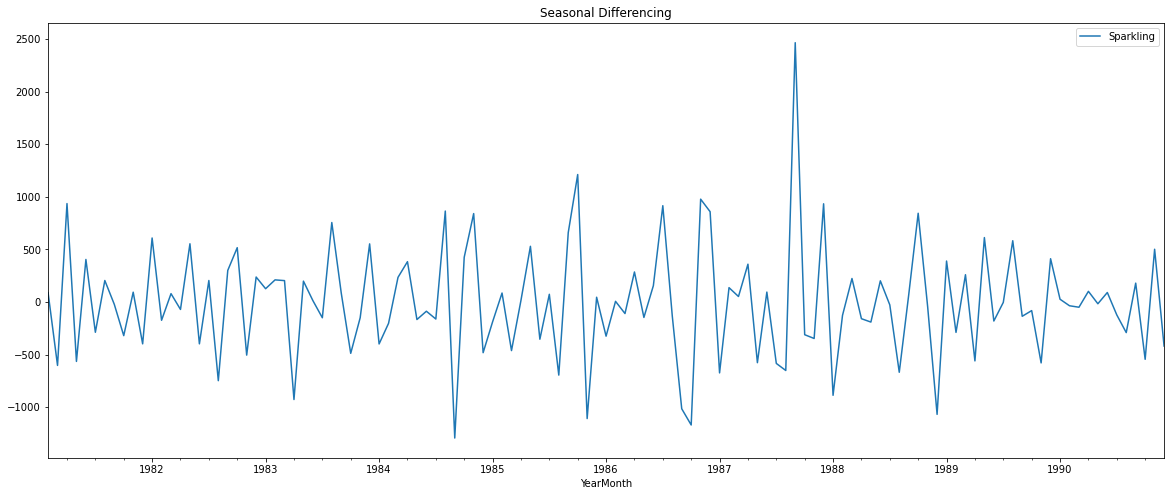

In [158]:
train.diff(12).dropna().diff().dropna().plot()
plt.title('Seasonal Differencing')

In [145]:
dftest=adfuller(train.diff(12).dropna().diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.468
DF test p-value is 0.042955150092817806
Number of lags used 10


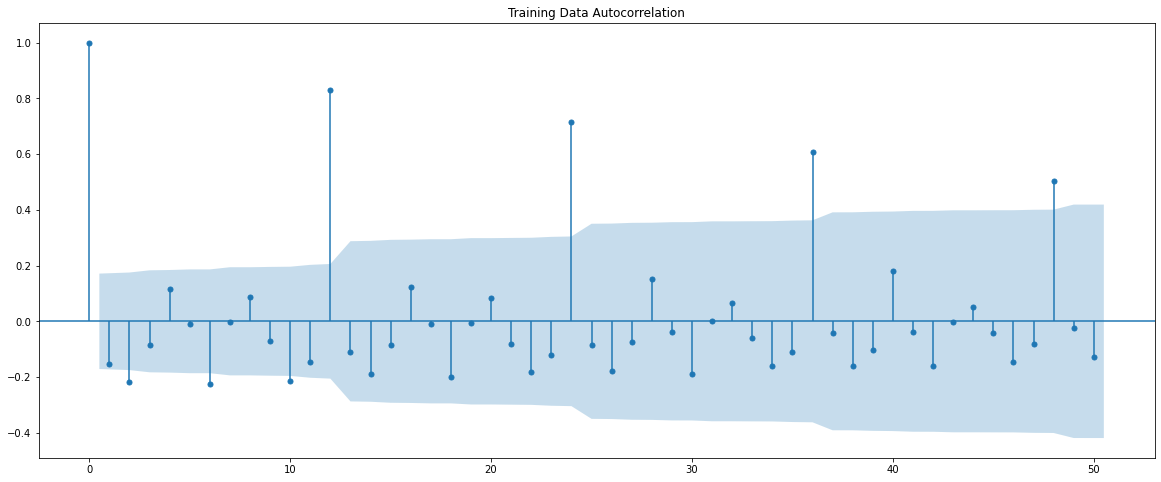

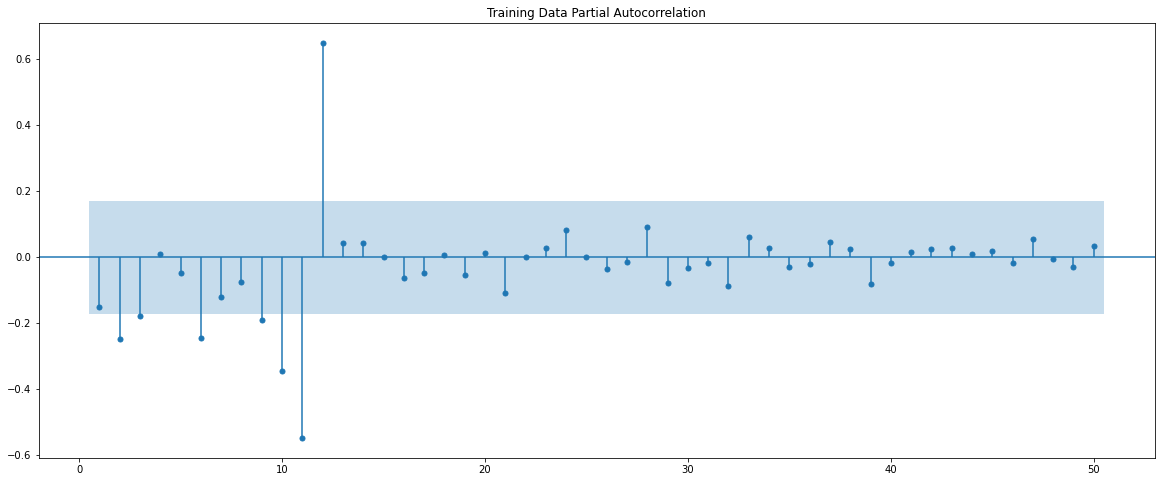

In [146]:
plot_acf(train.diff().dropna(),title='Training Data Autocorrelation',missing='drop',lags=50)
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle',lags=50);

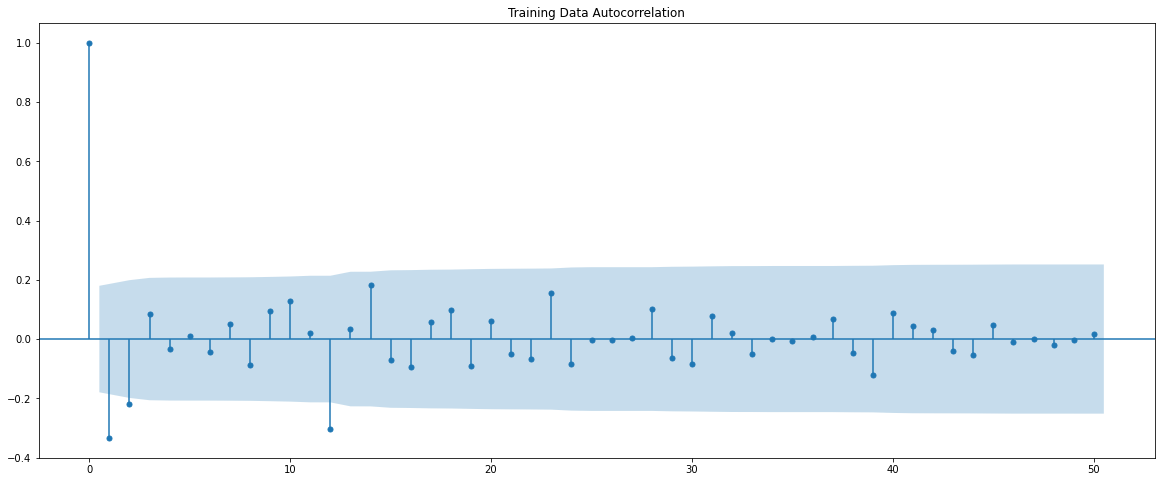

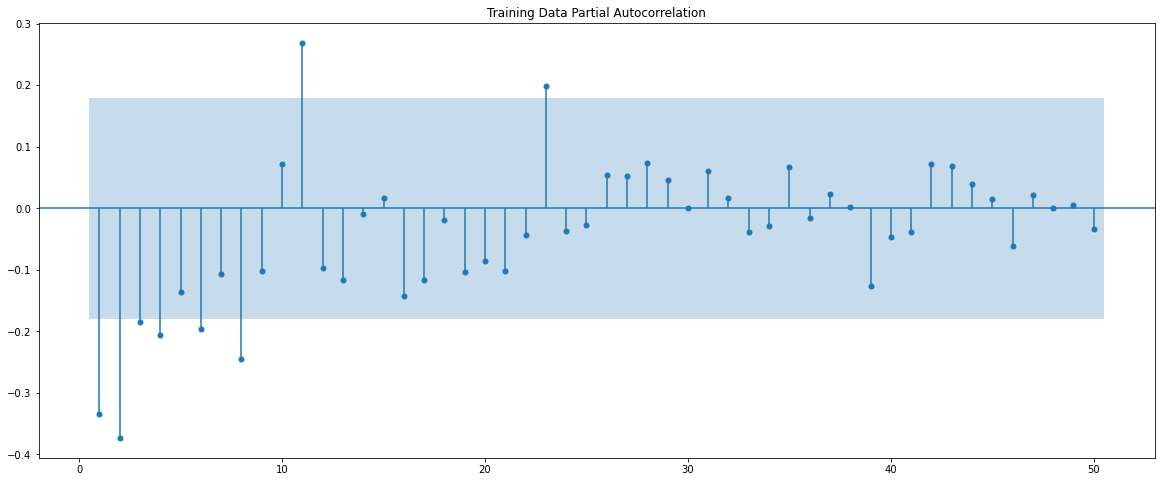

In [147]:
plot_acf(train.diff(12).dropna().diff().dropna(),title='Training Data Autocorrelation',missing='drop',lags=50)
plot_pacf(train.diff(12).dropna().diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle',lags=50);

In [148]:

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].astype('float64'),
                                order=(0,1,0),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(4, 1, [1, 2], 12)   Log Likelihood                -544.303
Date:                                 Sat, 18 Dec 2021   AIC                           1102.605
Time:                                         22:18:37   BIC                           1118.444
Sample:                                     01-01-1980   HQIC                          1108.904
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3381      0.215      1.573      0.116      -0.083       0

D:\Softwares\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


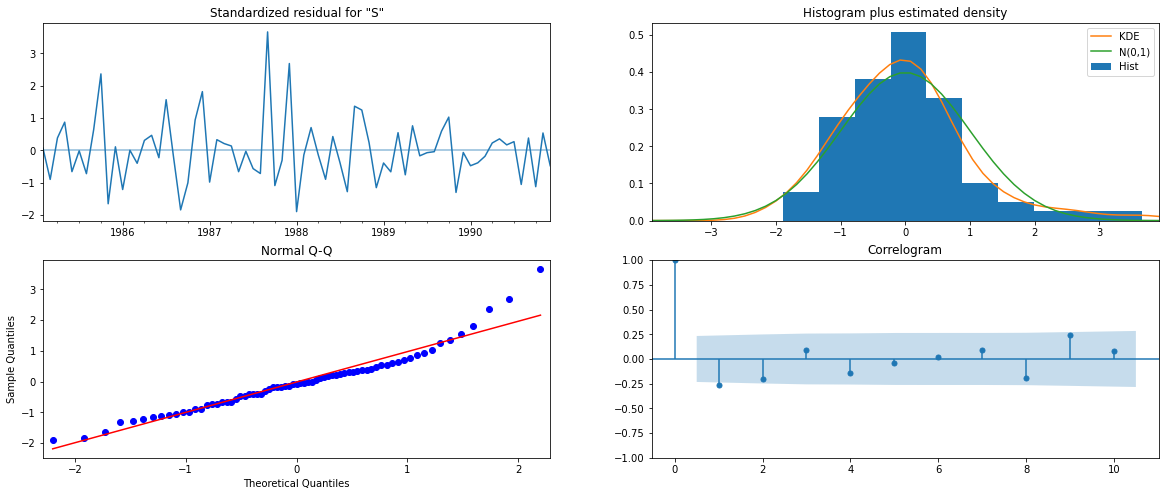

In [149]:
results_manual_SARIMA.plot_diagnostics();

In [150]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
print('RMSE for Manual Sarima model is :',mean_squared_error(predicted_manual_SARIMA.predicted_mean,test,squared=False))

rmse=mean_squared_error(predicted_manual_SARIMA.predicted_mean,test,squared=False)
sarima_models=pd.concat([sarima_models,pd.DataFrame({'RMSE':[rmse],'AIC':results_manual_SARIMA.aic},index=['SARIMAX(0, 1, 0)x(4, 1, 2, 12)'])])
sarima_models.sort_values(ascending=True,by='RMSE').sort_values(by='AIC')

RMSE for Manual Sarima model is : 1336.5585095964018


,RMSE,AIC
"SARIMAX(0, 1, 0)x(4, 1, 2, 12)",1336.558510,1102.605037
"SARIMAX(1, 1, 2)X(0, 1, 2, 12)",382.576734,1382.347780


Text(0.5, 1.0, 'Manual Sarima Predictions')

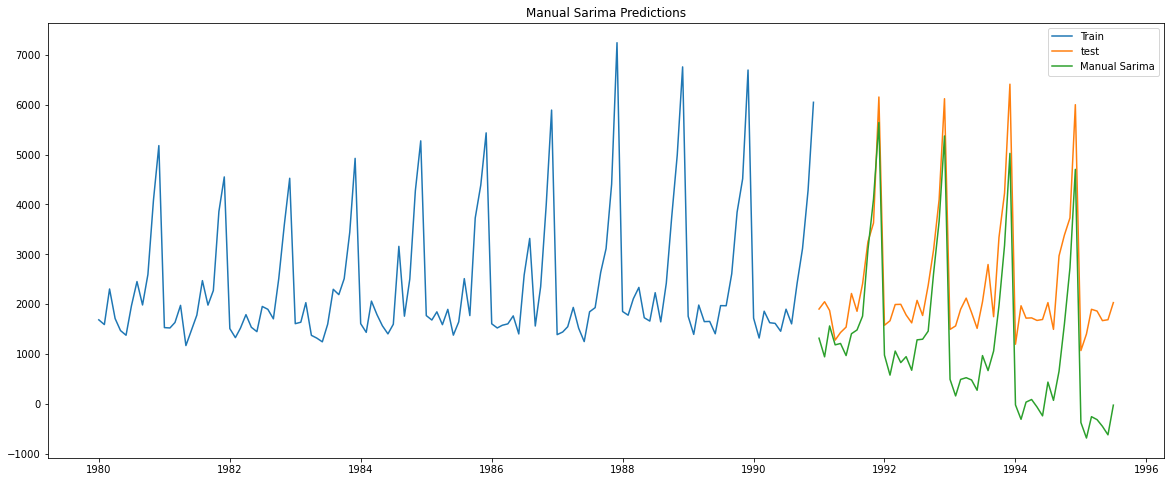

In [159]:
plt.plot(train,label='Train')
plt.plot(test,label='test')
plt.plot(predicted_manual_SARIMA.predicted_mean,label='Manual Sarima')
plt.legend()
plt.title('Manual Sarima Predictions')

In [169]:
results=pd.concat([results,pd.DataFrame({'RMSE':mean_squared_error(predicted_manual_SARIMA.predicted_mean,test,squared=False)},
                                        index=['Manual_SARIMA(0, 1, 0)(4, 1, 2, 12)'])])
results

,RMSE
Linear_Regression,1389.135175
Naive,3864.279352
Simple_Avg,1275.081804
Trailing_2,813.400684
Trailing_3,1028.605756
Trailing_4,1156.589694
Trailing_5,1234.045344
Trailing_6,1283.927428
Trailing_7,1331.163342
Simple_Exponential_Smoothing,1338.008384


## Building a optimal model on the full dataset

In [153]:
#2, 1, 1)x(2, 1, [], 24)
full_data_model=ExponentialSmoothing(sparkling,trend='additive',seasonal='additive',initialization_method='estimated').fit(optimized=True)
full_data_model.params

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.07596713146311772,
 'smoothing_trend': 0.03256921715086211,
 'smoothing_seasonal': 0.37660762886165167,
 'damping_trend': nan,
 'initial_level': 2356.500087258337,
 'initial_trend': -0.8449338106956193,
 'initial_seasons': array([-636.25474139, -723.00153617, -398.66964817, -473.45571811,
        -808.43306854, -815.37001157, -384.24814771,   73.00119661,
        -237.46281546,  272.34574748, 1541.39349329, 2590.11477306]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [154]:
full_data_model.forecast(steps=12) 

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1995-08-01    1877.431801
1995-09-01    2405.285747
1995-10-01    3242.105698
1995-11-01    3922.189524
1995-12-01    6118.502404
1996-01-01    1262.618990
1996-02-01    1592.137914
1996-03-01    1831.652945
1996-04-01    1806.470072
1996-05-01    1651.723185
1996-06-01    1586.507708
1996-07-01    1977.014975
Freq: MS, dtype: float64

In [155]:
forecast=pd.DataFrame(full_data_model.forecast(steps=12) ,columns=['Forecast'])
forecast['ci_lower']=forecast['Forecast']- (1.96* full_data_model.resid.std())
forecast['ci_upper']=forecast['Forecast']+ (1.96* full_data_model.resid.std())
forecast


,Forecast,ci_lower,ci_upper
1995-08-01,1877.431801,1159.508682,2595.354921
1995-09-01,2405.285747,1687.362628,3123.208866
1995-10-01,3242.105698,2524.182579,3960.028817
1995-11-01,3922.189524,3204.266404,4640.112643
1995-12-01,6118.502404,5400.579284,6836.425523
1996-01-01,1262.618990,544.695870,1980.542109
1996-02-01,1592.137914,874.214795,2310.061033
1996-03-01,1831.652945,1113.729826,2549.576064
1996-04-01,1806.470072,1088.546953,2524.393191
1996-05-01,1651.723185,933.800065,2369.646304


In [156]:
print('Rmse for the full dataset=',mean_squared_error(sparkling['Sparkling'],full_data_model.fittedvalues,squared=False))

Rmse for the full dataset= 365.3076437844148


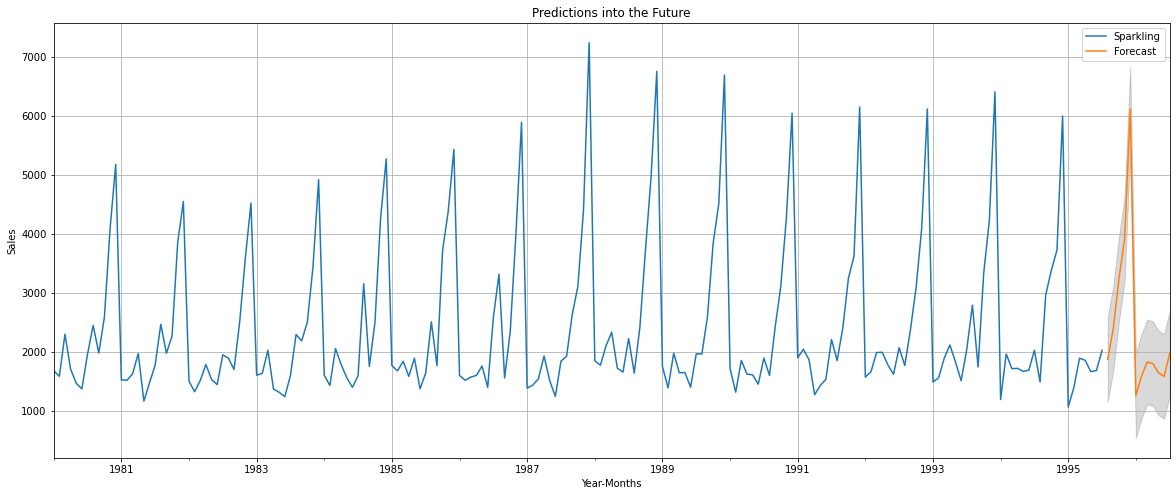

In [157]:
axis=sparkling.plot(label='Observed')
forecast['Forecast'].plot(label='Forecast')
axis.fill_between(forecast.index,forecast['ci_lower'],
                 forecast['ci_upper'],color='k',alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title('Predictions into the Future')
plt.legend()
plt.grid()